# Exercício 4

## 1

In [90]:
import networkx as nx
import community as community_louvain
import leidenalg as community_leiden

graph: nx.Graph = nx.read_gml("GraphMissingEdges.gml")


## 1.a

## Comunidades usando Louvain

In [91]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

partition = community_louvain.best_partition(graph)

/var/folders/r3/g6fb9s390t1_vkdf2d9xkdwm0000gn/T/ipykernel_43779/1807543872.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


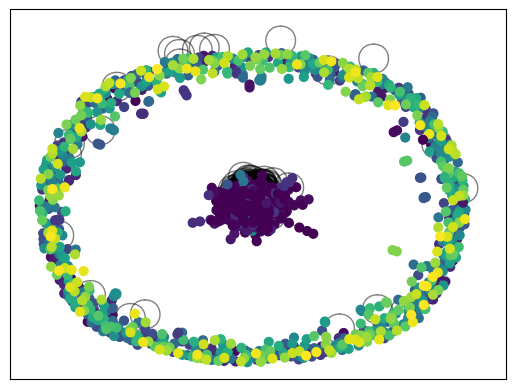

In [92]:
pos = nx.spring_layout(graph)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.show()

### Quantidade de comunidades

In [93]:
print(len(set(partition.values())))

803


In [94]:
data = {}
for node, community in partition.items():
    if data.get(community):
        data[community].append(node)
    else:
        data[community] = [node]

### Quantidade das categorias por comunidades

In [95]:
import csv

larger_community = data[0]

with open("categories.csv", "r") as f:
    categories = list(csv.DictReader(f))

result = {}
for community, nodes in data.items():
    result[community] = {}
    for node in nodes:
        for node_category in graph.nodes()[node]["categories"].split(","):
            for category in categories:
                if category["CategoryId"] == node_category:
                    if result[community].get(category["names"]):
                        result[community][category["names"]] += 1
                    else:
                        result[community][category["names"]] = 1

for community, categories in sorted(result.items()):
    print(f"Community {community} - Categories: {categories}")
    print("=================================================")

Community 0 - Categories: {'Restaurants': 403, 'Cafes': 20, 'Shopping': 149, 'Arts & Crafts': 13, 'Shoe Stores': 9, 'Costumes': 2, 'Fashion': 34, 'Asian Fusion': 11, 'Sushi Bars': 14, 'Chinese': 20, 'Caterers': 15, 'Fast Food': 34, 'Event Planning & Services': 66, 'Food': 215, 'Food Delivery Services': 8, 'Vegetarian': 14, 'Discount Store': 6, 'Department Stores': 6, 'Home Decor': 13, 'Furniture Stores': 10, 'Home & Garden': 33, 'American (New)': 61, 'Bars': 118, 'Burgers': 33, 'Nightlife': 130, 'Bubble Tea': 3, 'Pizza': 78, 'Performing Arts': 7, 'Cinema': 1, 'Opera & Ballet': 1, 'Arts & Entertainment': 45, 'Maternity Wear': 1, 'Baby Gear & Furniture': 3, "Children's Clothing": 2, 'Beauty & Spas': 65, 'Barbers': 8, 'Grocery': 28, 'Breakfast & Brunch': 37, 'Food Trucks': 11, 'Mexican': 23, 'Greek': 7, 'Diners': 14, 'American (Traditional)': 70, 'Seafood': 17, 'Sandwiches': 64, 'Vietnamese': 5, 'Fitness & Instruction': 18, 'Active Life': 42, 'Yoga': 11, 'Latin American': 6, 'Flowers & Gi

### Comunidades usando Leiden

In [96]:
import igraph

with open("GraphMissingEdges.gml", "rb") as f:
    igraph_missing_edges = igraph.Graph.Read_GML(f)
partition = community_leiden.find_partition(igraph_missing_edges, community_leiden.ModularityVertexPartition)
new_graph = igraph_missing_edges.to_networkx()

/var/folders/r3/g6fb9s390t1_vkdf2d9xkdwm0000gn/T/ipykernel_43779/3562475459.py:4: RuntimeWarning: One or more unknown entities will be returned verbatim (&#38;). at src/io/gml.c:149
  igraph_missing_edges = igraph.Graph.Read_GML(f)


### Quantidade de comunidades

In [97]:
print(len(partition))

821


In [98]:
data = {}
for idx, nodes in enumerate(partition):
    for node in nodes:
        if data.get(idx):
            data[idx].append(node)
        else:
            data[idx] = [node]

In [99]:
with open("categories.csv", "r") as f:
    categories = list(csv.DictReader(f))

result = {}
for community, nodes in sorted(data.items()):
    result[community] = {}
    for node in nodes:
        for node_category in new_graph.nodes()[node]["categories"].split(","):
            for category in categories:
                if category["CategoryId"] == node_category:
                    if result[community].get(category["names"]):
                        result[community][category["names"]] += 1
                    else:
                        result[community][category["names"]] = 1

for community, categories in result.items():
    print(f"Community {community} - Categories: {categories}")
    print("=================================================")

Community 0 - Categories: {'Restaurants': 415, 'Cafes': 23, 'Shopping': 137, 'Arts & Crafts': 15, 'Shoe Stores': 8, 'Costumes': 2, 'Fashion': 32, 'Chinese': 23, 'Asian Fusion': 12, 'Sushi Bars': 13, 'Caterers': 17, 'Fast Food': 28, 'Event Planning & Services': 58, 'Food': 213, 'Food Delivery Services': 7, 'Vegetarian': 15, 'Discount Store': 5, 'Department Stores': 7, 'Home Decor': 12, 'Furniture Stores': 9, 'Home & Garden': 30, 'American (New)': 64, 'Bars': 122, 'Burgers': 36, 'Nightlife': 133, 'Bubble Tea': 4, 'Ice Cream & Frozen Yogurt': 18, 'Performing Arts': 7, 'Cinema': 2, 'Opera & Ballet': 1, 'Arts & Entertainment': 50, 'Maternity Wear': 1, 'Baby Gear & Furniture': 4, "Children's Clothing": 2, 'Beauty & Spas': 56, 'Barbers': 7, 'Car Wash': 4, 'Automotive': 33, 'Grocery': 21, 'Breakfast & Brunch': 44, 'Food Trucks': 13, 'Mexican': 22, 'Greek': 9, 'Diners': 19, 'American (Traditional)': 72, 'Seafood': 18, 'Pizza': 73, 'Sandwiches': 78, 'Vietnamese': 7, 'Latin American': 5, 'Dive Ba

## 1.b

In [100]:
from networkx.algorithms.community import k_clique_communities

communiteis = list(k_clique_communities(graph, 4))

data = {}
for idx, nodes in enumerate(communiteis):
    for node in nodes:
        if data.get(idx):
            data[idx].append(node)
        else:
            data[idx] = [node]


In [101]:
with open("categories.csv", "r") as f:
    categories = list(csv.DictReader(f))

result = {}
for community, nodes in sorted(data.items()):
    result[community] = {}
    for node in nodes:
        for node_category in graph.nodes()[node]["categories"].split(","):
            for category in categories:
                if category["CategoryId"] == node_category:
                    if result[community].get(category["names"]):
                        result[community][category["names"]] += 1
                    else:
                        result[community][category["names"]] = 1

for community, categories in result.items():
    print(f"Community {community} - Categories: {categories}")
    print("=================================================")

Community 0 - Categories: {'American (Traditional)': 104, 'Restaurants': 544, 'Steakhouses': 21, 'Breakfast & Brunch': 74, 'Delis': 15, 'Sandwiches': 70, 'Massage': 4, 'Massage Therapy': 2, 'Beauty & Spas': 19, 'Health & Medical': 3, 'Reflexology': 1, 'Cafes': 37, 'American (New)': 117, 'Indian': 11, 'Bars': 180, 'Cocktail Bars': 49, 'Nightlife': 186, 'Tapas Bars': 3, 'Spanish': 2, 'Tapas/Small Plates': 11, 'Wine Bars': 24, 'Asian Fusion': 21, 'Comfort Food': 4, 'Fast Food': 8, 'Pubs': 24, 'Chicken Wings': 12, 'Noodles': 12, 'Ramen': 8, 'Japanese': 30, 'Vegetarian': 21, 'Poutineries': 1, 'Salad': 37, 'Hot Dogs': 3, 'Food': 240, 'Desserts': 43, 'Diners': 24, 'BeerWineSpirits': 24, 'Pizza': 54, 'Breweries': 21, 'Bakeries': 26, 'Gelato': 2, 'Italian': 49, 'Pasta Shops': 2, 'Specialty Food': 29, 'Seafood': 44, 'Thai': 27, 'Szechuan': 7, 'Chinese': 32, 'Sports Bars': 22, 'Vietnamese': 8, 'French': 14, 'Macarons': 1, 'Coffee & Tea': 65, 'Bagels': 8, 'Soup': 12, 'Skin Care': 3, 'Shopping': 22

## 1.c

Acima tem a exibição das comunidades mostrando a quantidade das categorias dos nós.
Analizando a primeira comunidade que cada algorítimo gerou nos dá uma ideia de que faz sentido sim, a maioria dos estabelecimentos com a categoria Restaurants ficam nessa primeira comunidade mesmo a quantidade de comunidades do algoritimo k-clique gerando bem menos comunidades que as demais.